In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost h5py joblib

In [2]:
import os
import h5py
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


print("All packages imported successfully!")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

All packages imported successfully!


In [3]:
df = pd.read_csv('./balanced_alzheimers_data.csv')
df.head().T

,0,1,2,3,4
PatientID,6068,6327,5824,6875,5491
Age,60,80,72,70,90
Gender,0,0,1,0,0
Ethnicity,0,0,1,0,1
EducationLevel,1,1,1,2,0
BMI,31.425226,16.500549,16.563268,29.597785,29.211112
Smoking,0,0,0,1,0
AlcoholConsumption,1.742579,11.106983,0.625712,13.282468,15.811718
PhysicalActivity,2.689362,2.544479,9.153619,1.271396,1.431181
DietQuality,3.266146,3.74131,9.402803,8.065315,9.419059


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1520 non-null   int64  
 1   Age                        1520 non-null   int64  
 2   Gender                     1520 non-null   int64  
 3   Ethnicity                  1520 non-null   int64  
 4   EducationLevel             1520 non-null   int64  
 5   BMI                        1520 non-null   float64
 6   Smoking                    1520 non-null   int64  
 7   AlcoholConsumption         1520 non-null   float64
 8   PhysicalActivity           1520 non-null   float64
 9   DietQuality                1520 non-null   float64
 10  SleepQuality               1520 non-null   float64
 11  FamilyHistoryAlzheimers    1520 non-null   int64  
 12  CardiovascularDisease      1520 non-null   int64  
 13  Diabetes                   1520 non-null   int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,1520.0,5830.254605,622.581147,4753.000000,5284.750000,5828.500000,6367.500000,6899.000000
Age,1520.0,74.779605,8.989760,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,1520.0,0.498026,0.500161,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,1520.0,0.699342,0.992267,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,1520.0,1.284868,0.902652,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,1520.0,27.735288,7.212703,15.008851,21.688694,27.879803,33.917163,39.992767
Smoking,1520.0,0.294737,0.456074,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,1520.0,10.100322,5.763982,0.036260,5.218000,9.888851,15.236511,19.988291
PhysicalActivity,1520.0,4.897170,2.854789,0.003616,2.576863,4.719842,7.376344,9.987429
DietQuality,1520.0,5.016962,2.903330,0.009385,2.514296,5.147294,7.520056,9.998346


In [6]:
# Count occurrences of each unique value in the 'DoctorInCharge' 
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    1520
Name: count, dtype: int64

In [7]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [8]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

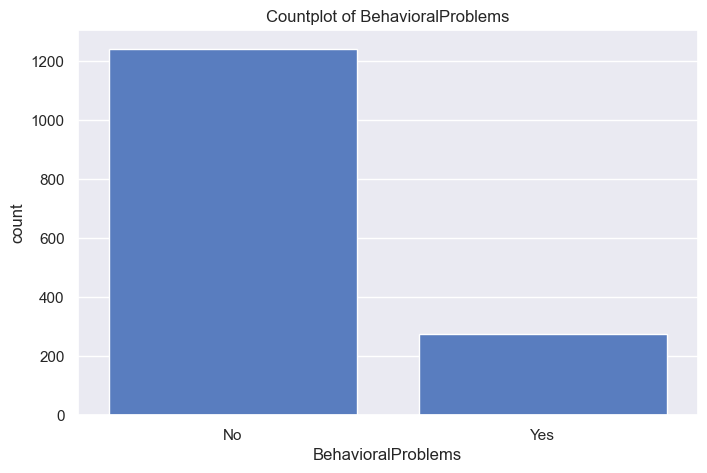

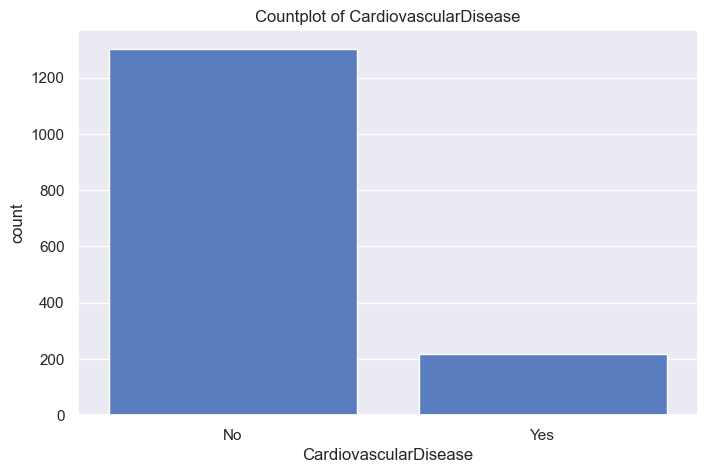

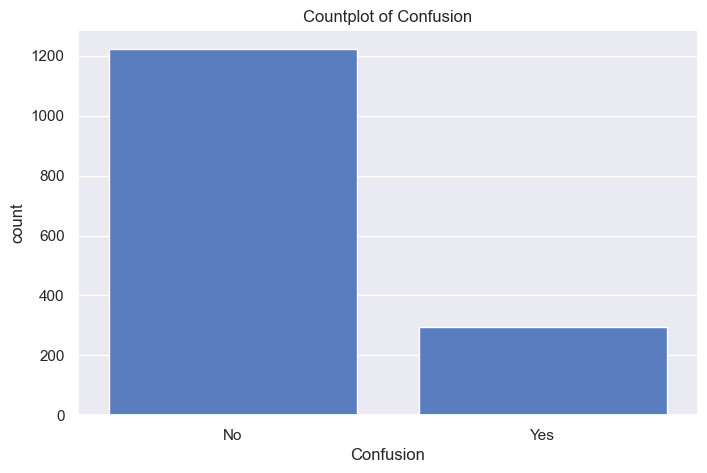

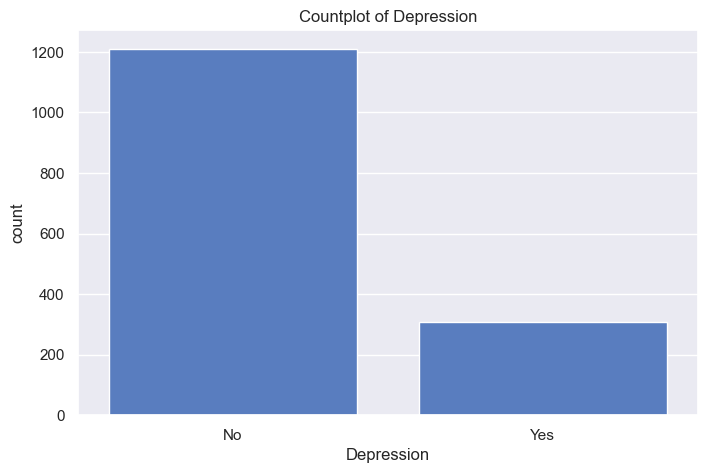

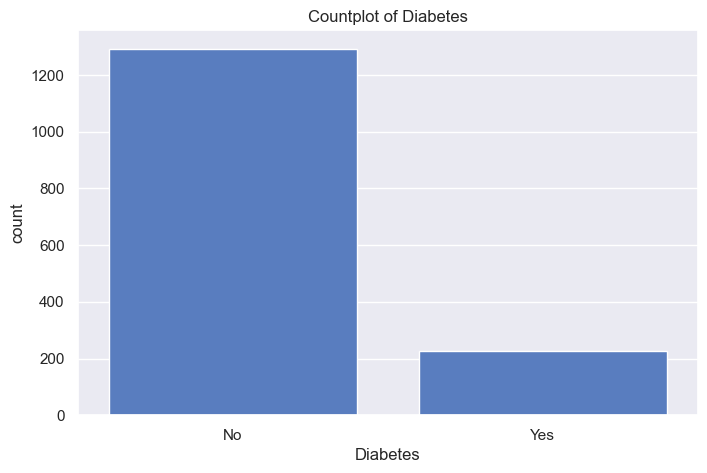

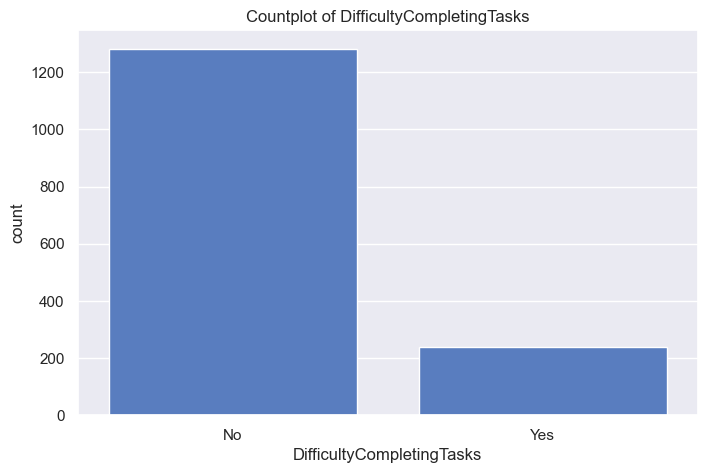

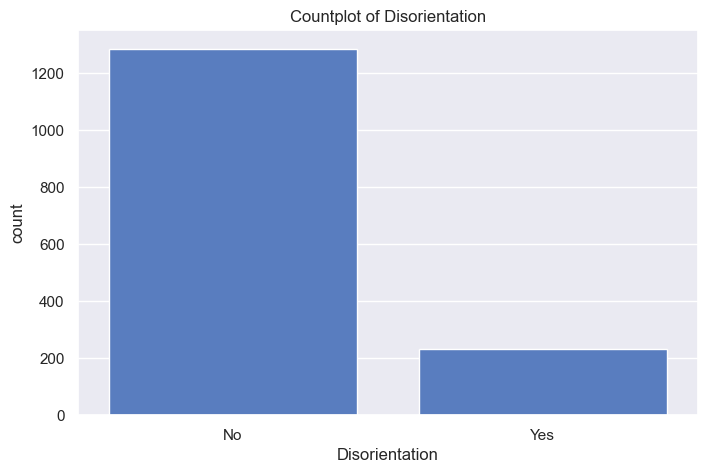

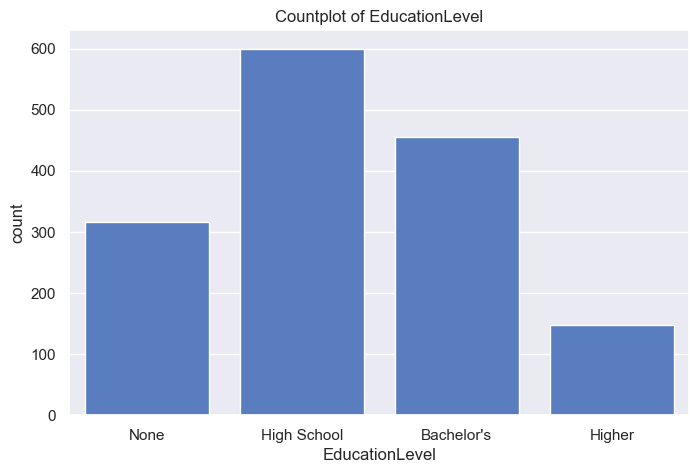

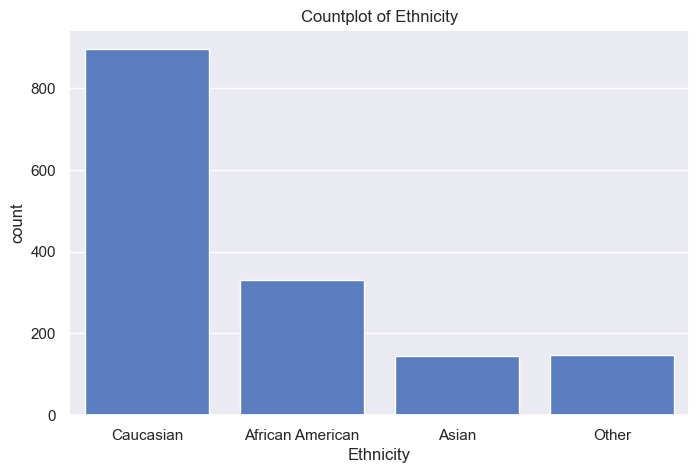

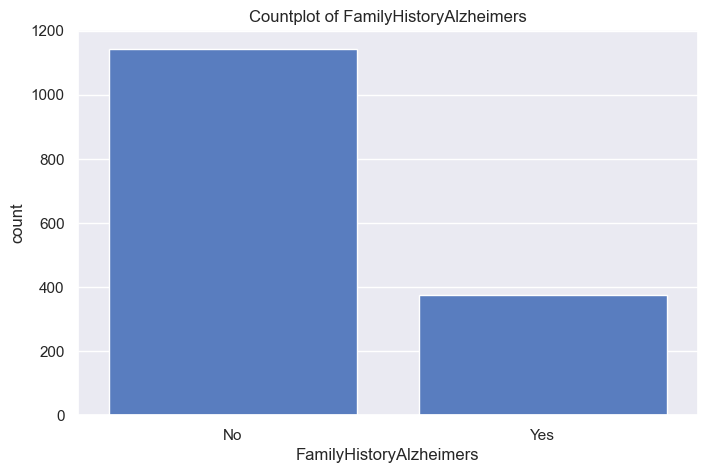

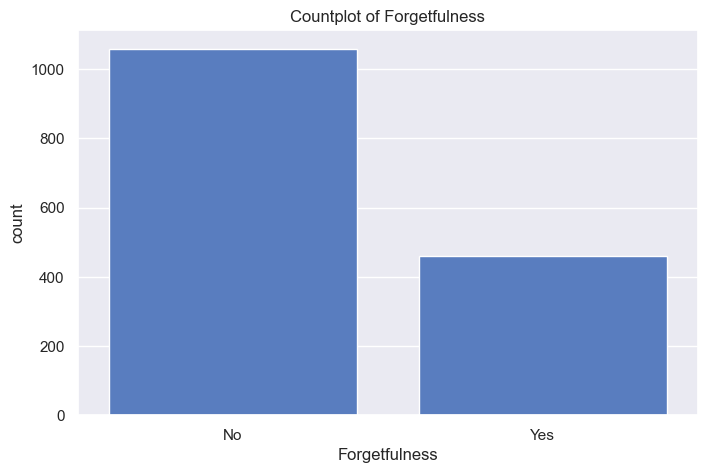

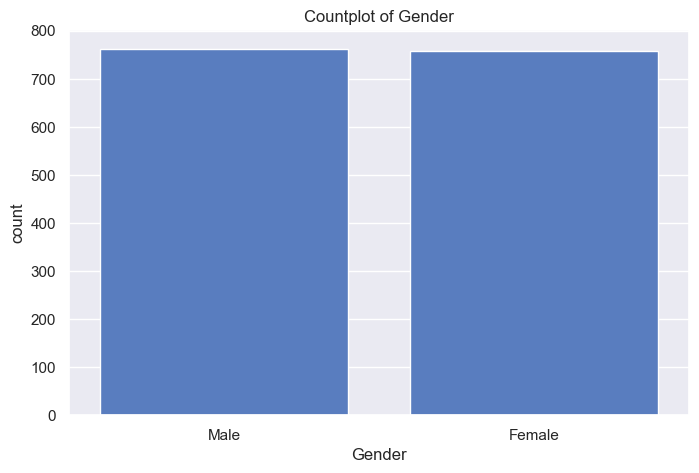

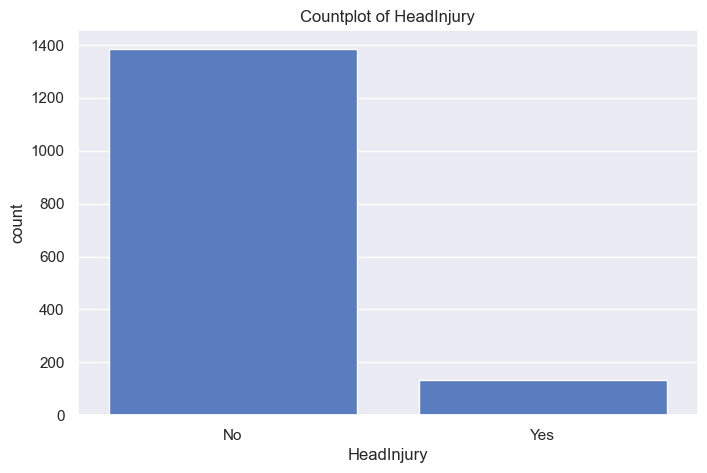

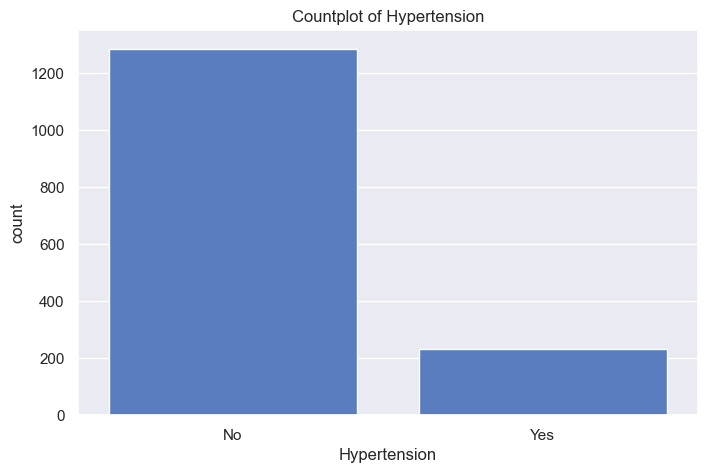

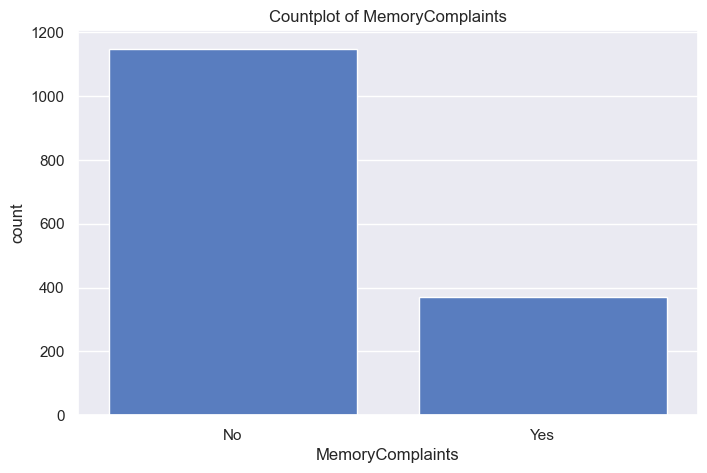

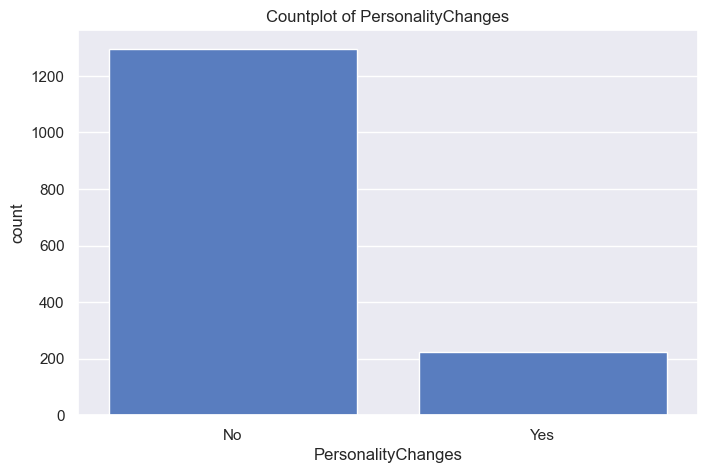

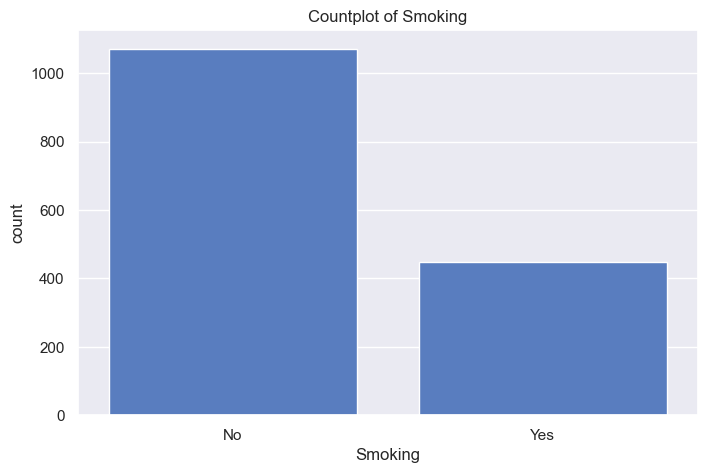

In [9]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()

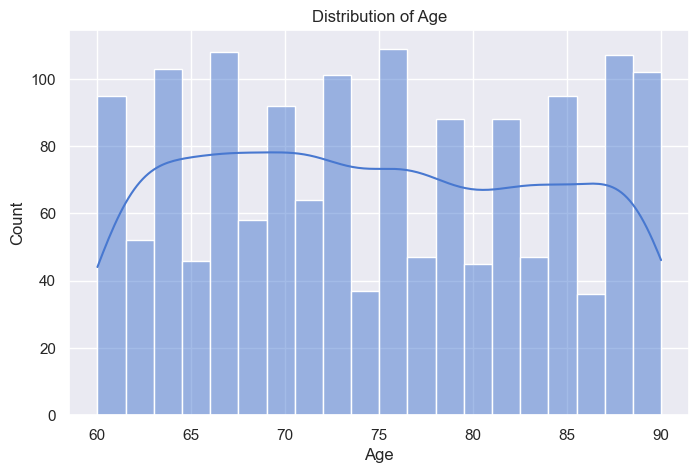

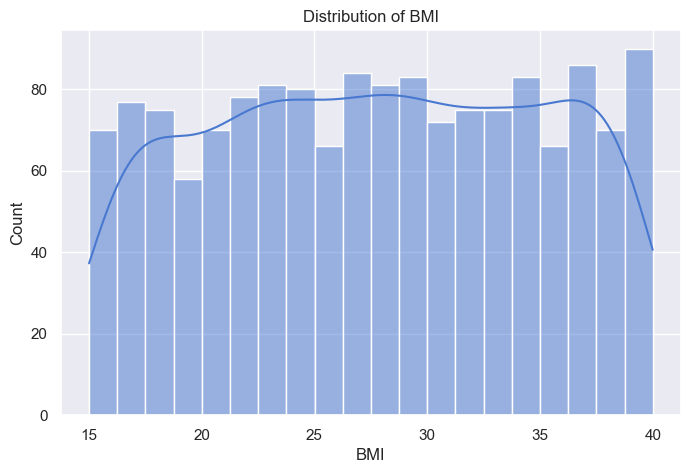

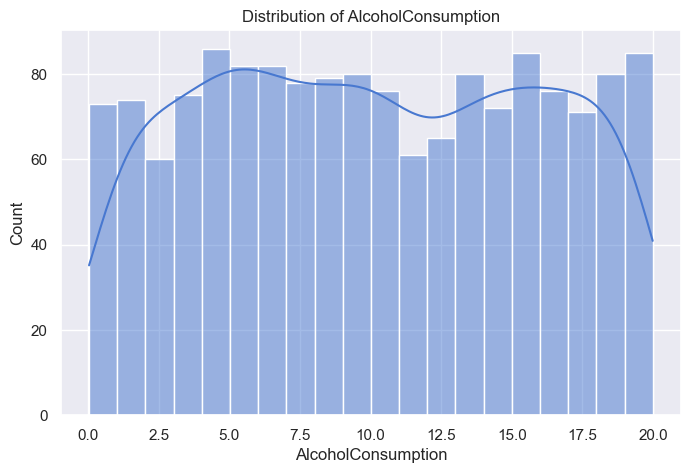

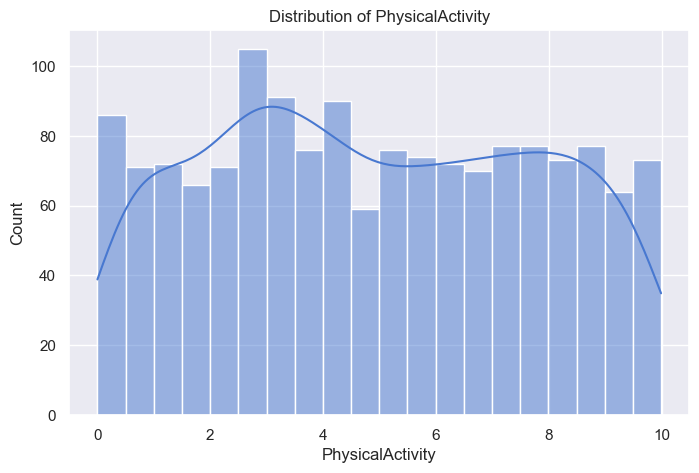

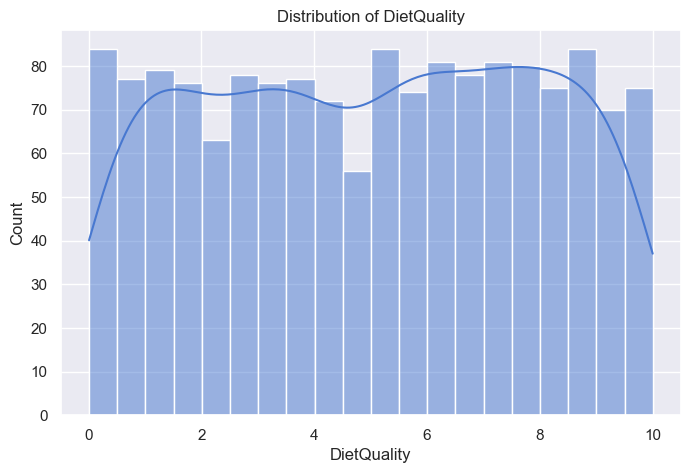

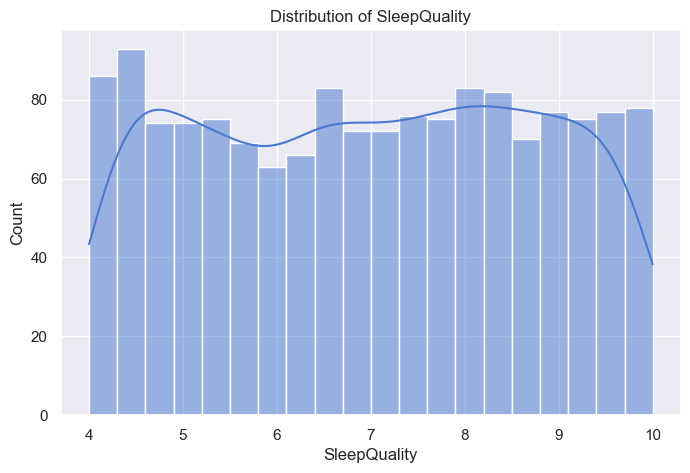

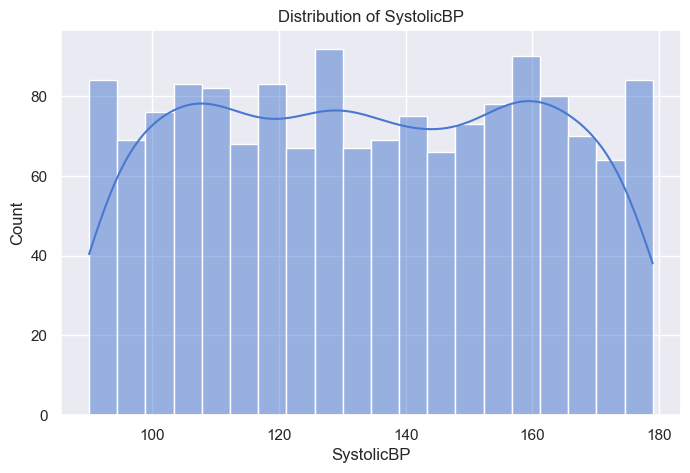

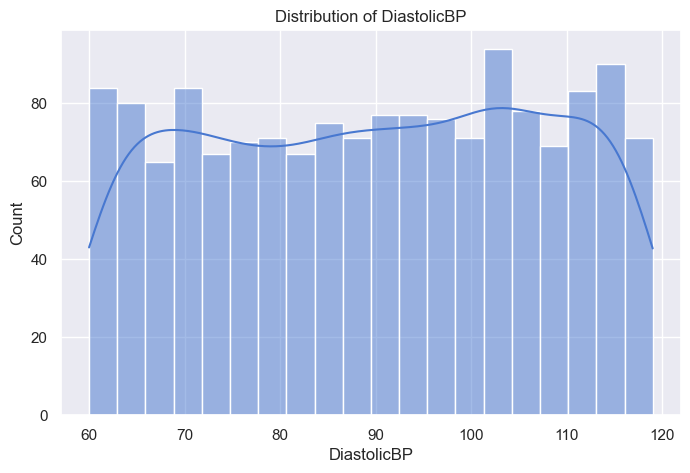

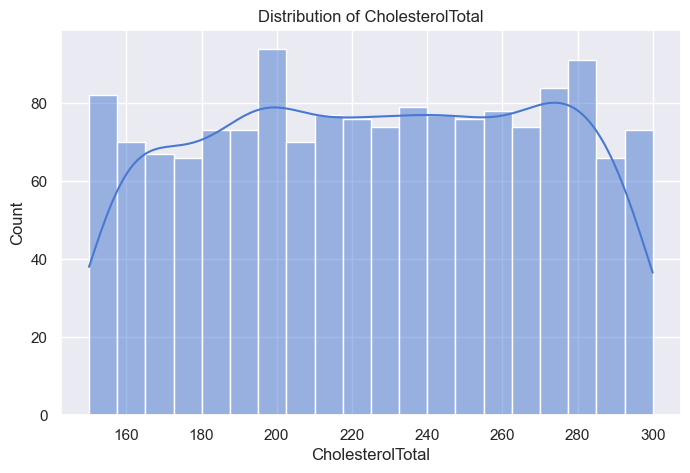

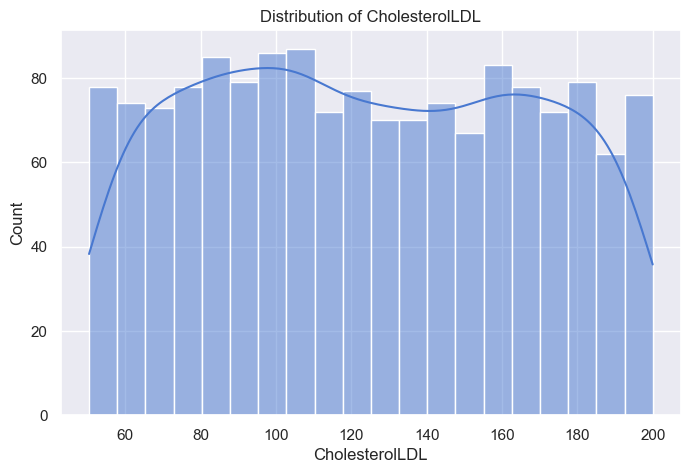

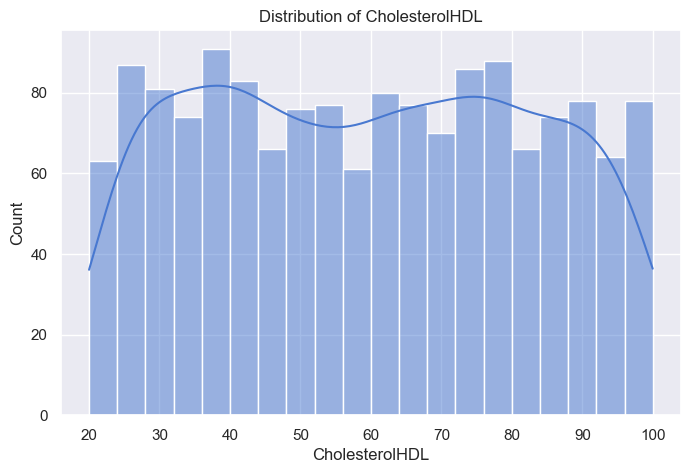

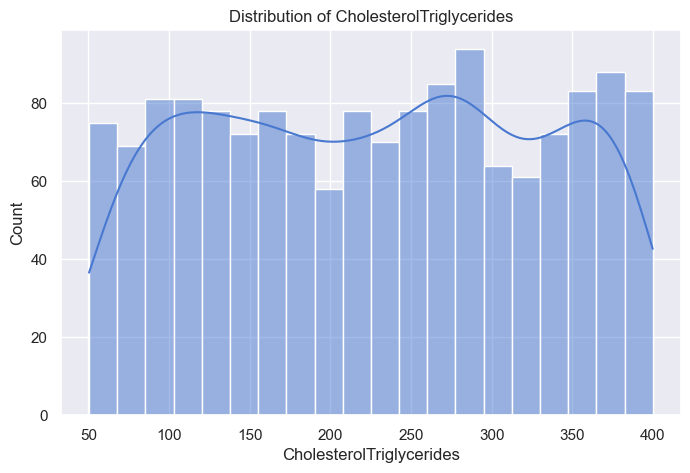

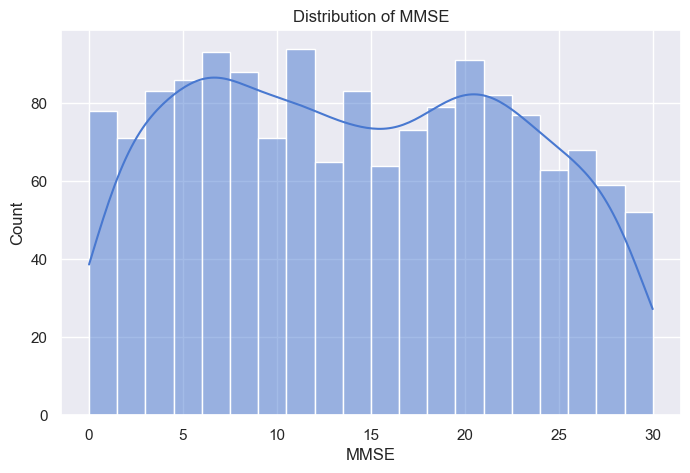

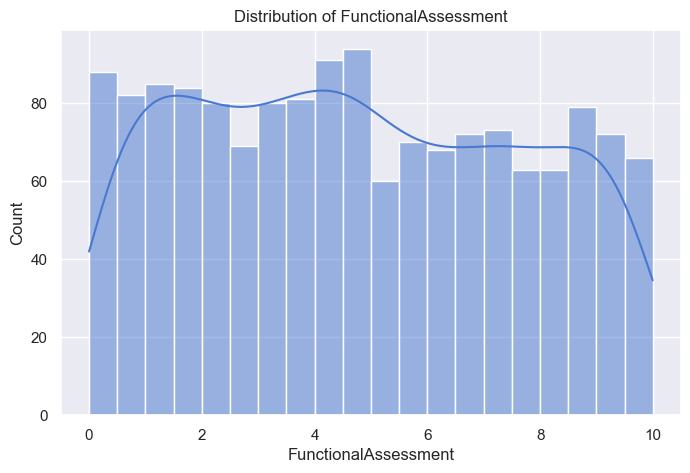

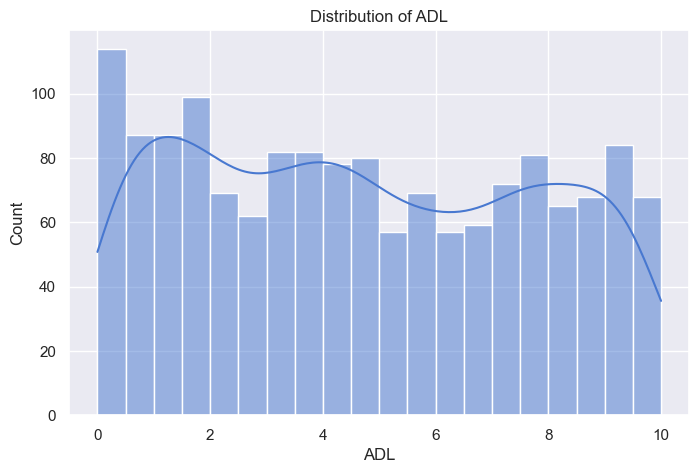

In [10]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

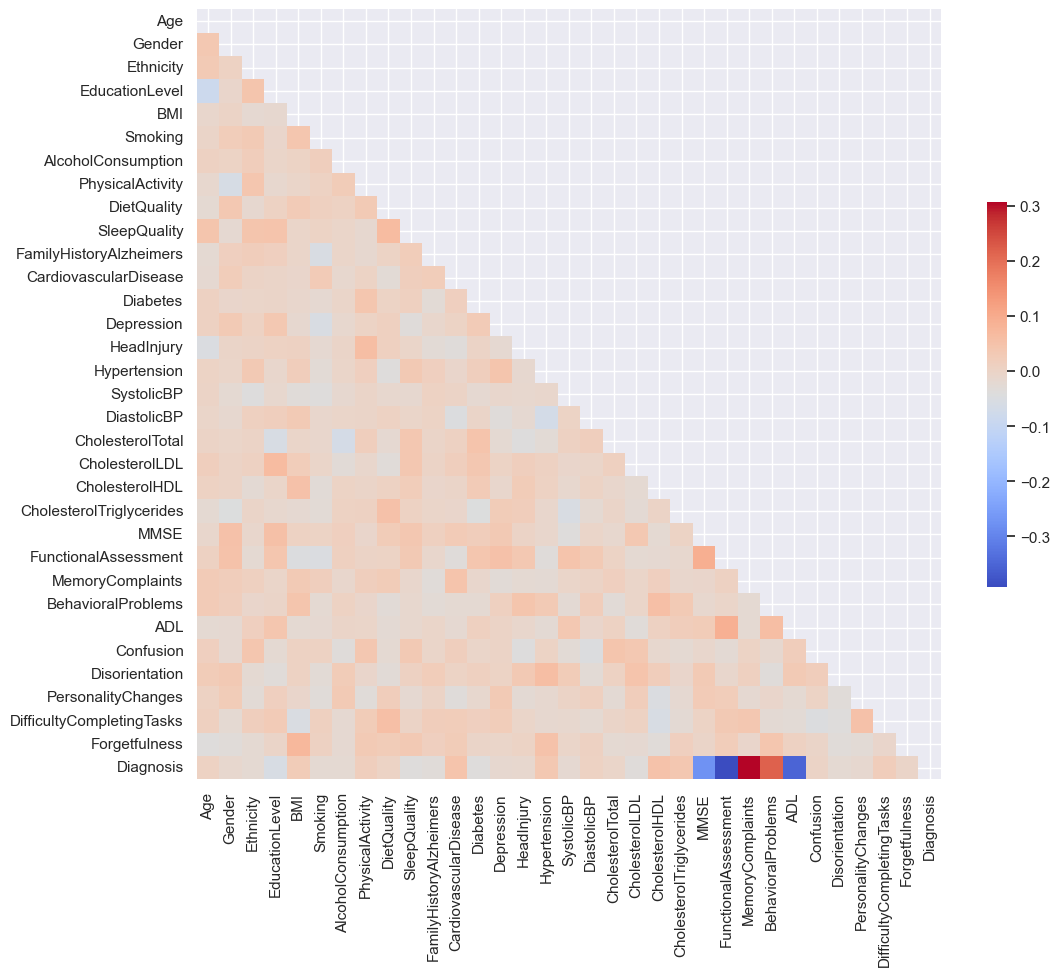

In [11]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

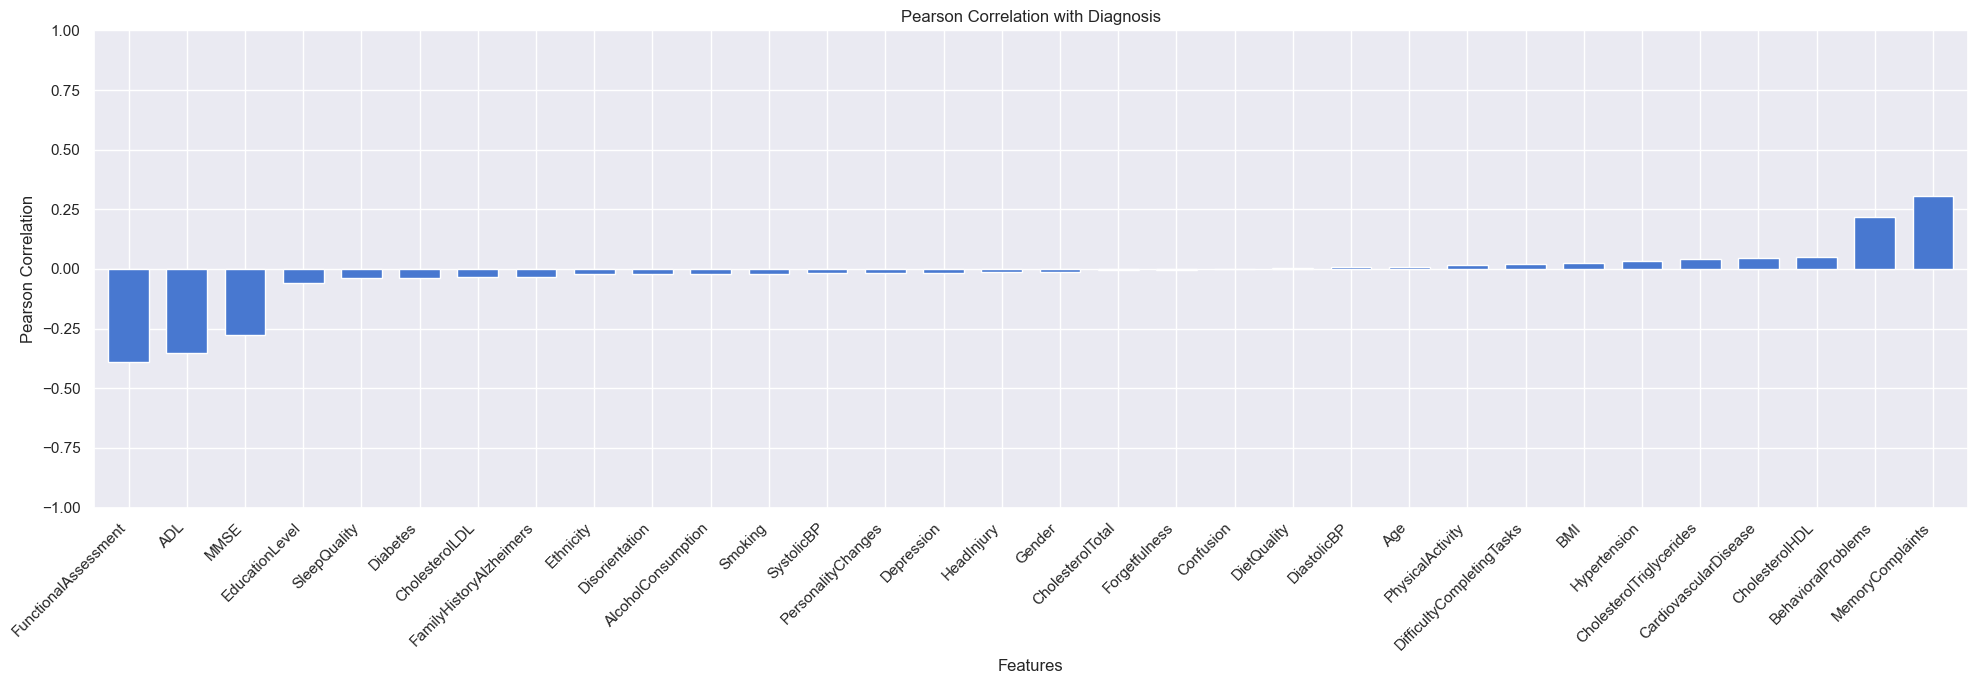

In [12]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

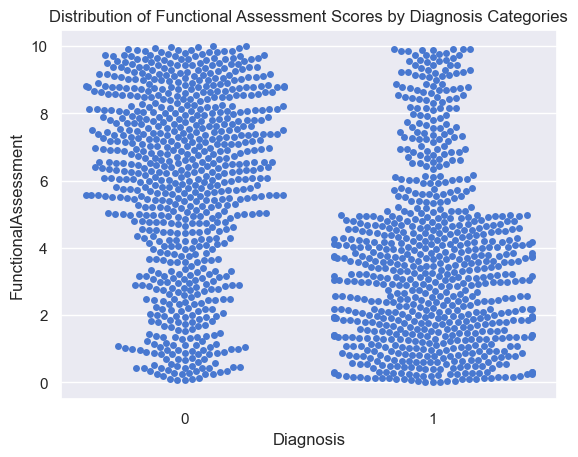

In [13]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')        
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

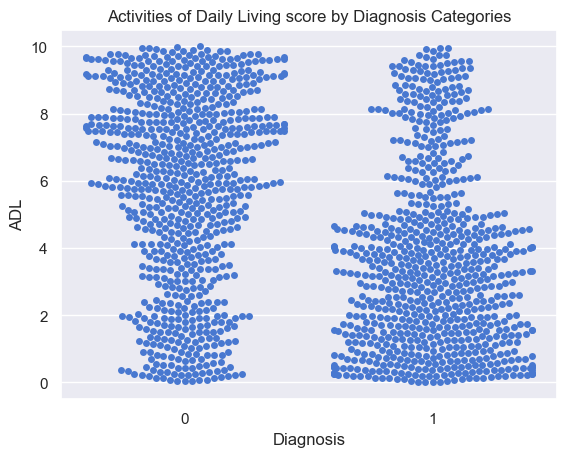

In [14]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')        
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

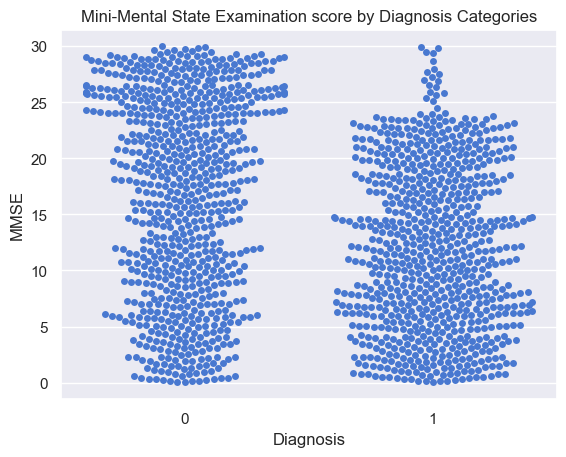

In [15]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')        
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

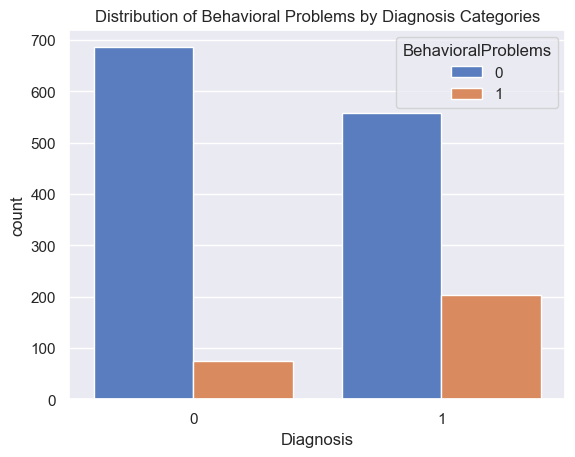

In [16]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

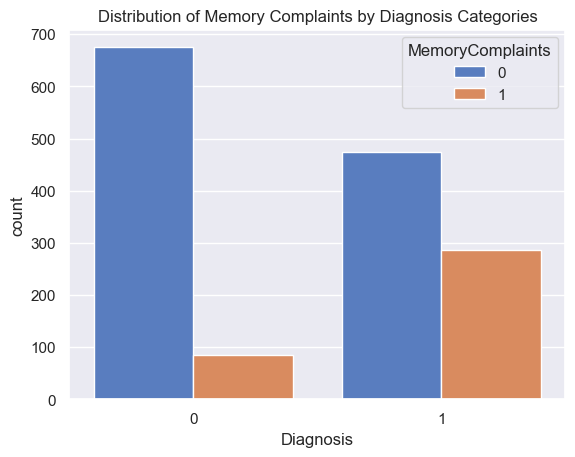

In [17]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

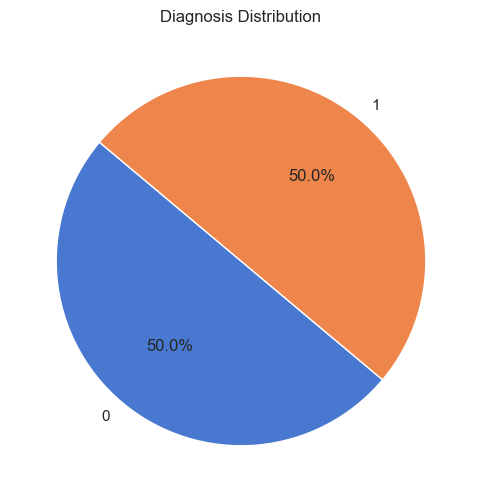

In [18]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

In [19]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,60,0,0,1,31.425226,0,1.742579,2.689362,3.266146,5.880669,...,4.408669,0,0,3.027579,0,0,0,0,0,1
1,80,0,0,1,16.500549,0,11.106983,2.544479,3.741310,8.445284,...,8.014090,0,0,5.938116,0,0,0,0,0,0
2,72,1,1,1,16.563268,0,0.625712,9.153619,9.402803,6.596390,...,5.832612,1,0,4.092610,0,0,0,0,0,0
3,70,0,0,2,29.597785,1,13.282468,1.271396,8.065315,9.295084,...,3.844201,0,0,7.070712,0,0,1,0,0,1
4,90,0,1,0,29.211112,0,15.811718,1.431181,9.419059,7.862941,...,0.181755,0,0,0.803032,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,83,0,3,1,39.679105,1,3.393512,7.959483,3.764520,9.113599,...,0.254450,0,1,4.517712,0,0,0,0,0,0
1516,80,0,0,3,28.366192,1,18.530598,5.630666,6.275748,7.203159,...,3.651309,0,0,0.041137,0,0,0,1,1,0
1517,61,0,0,2,15.283169,0,2.196795,3.170947,0.724949,4.346708,...,9.736511,0,0,7.537656,0,0,0,1,0,0
1518,88,1,3,1,26.639474,1,13.727209,1.655019,5.712438,9.088533,...,1.315985,0,0,6.395604,1,0,0,1,0,0


In [20]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[60 80 72 70 90 85 79 74 89 84 75 64 68 63 86 66 83 81 65 71 67 73 82 69
 87 88 62 76 61 77 78]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 1 3 2]

Unique values in column 'EducationLevel':
[1 2 0 3]

Unique values in column 'BMI':
[31.42522551 16.50054867 16.56326836 ... 15.28316885 26.63947412
 39.49818583]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[ 1.74257878 11.10698344  0.625712   ...  2.19679546 13.72720943
  3.20747804]

Unique values in column 'PhysicalActivity':
[2.68936242 2.54447917 9.15361863 ... 3.17094742 1.65501915 3.29767409]

Unique values in column 'DietQuality':
[3.26614643 3.74131009 9.40280342 ... 0.72494896 5.7124383  4.37239395]

Unique values in column 'SleepQuality':
[5.88066913 8.44528449 6.59638957 ... 4.34670821 9.08853343 7.11703625]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[1

In [21]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [22]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-1.644590,0,0,1,0.511757,0,-1.450472,-0.773624,-0.603236,-0.626984,...,-0.129109,0,0,-0.563395,0,0,0,0,0,1
1,0.580896,0,0,1,-1.558145,0,0.174704,-0.824392,-0.439520,0.829403,...,1.123420,0,0,0.414910,0,0,0,0,0,0
2,-0.309299,1,1,1,-1.549446,0,-1.644302,1.491476,1.511122,-0.220543,...,0.365571,1,0,-0.205411,0,0,0,0,0,0
3,-0.531847,0,0,2,0.258309,1,0.552256,-1.270485,1.050296,1.311986,...,-0.325206,0,0,0.795604,0,0,1,0,0,1
4,1.693639,0,1,0,0.204682,0,0.991203,-1.214496,1.516722,0.498704,...,-1.597545,0,0,-1.311121,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.914719,0,3,1,1.656487,1,-1.163955,1.073046,-0.431523,1.208924,...,-1.572291,0,1,-0.062523,0,0,0,0,0,0
1516,0.580896,0,0,3,0.087500,1,1.463060,0.257020,0.433709,0.124028,...,-0.392217,0,0,-1.567214,0,0,0,1,1,0
1517,-1.533316,0,0,2,-1.726983,0,-1.371643,-0.604875,-1.478794,-1.498086,...,1.721792,0,0,0.952556,0,0,0,1,0,0
1518,1.471090,1,3,1,-0.151978,1,0.629440,-1.136062,0.239623,1.194690,...,-1.203512,0,0,0.568683,1,0,0,1,0,0


In [23]:
#split data into features and target
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# #fit models using GridSearchCV for hyperparameter tuning
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     report = classification_report(y_test, y_pred)
#     print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

In [24]:
# Ensure directory exists for saving models
os.makedirs("saved_models", exist_ok=True)

# Fit models using GridSearchCV for hyperparameter tuning and save them
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Save models in .h5 if supported, otherwise use .pkl
    if isinstance(best_model, (XGBClassifier, CatBoostClassifier)):  
        best_model.save_model(f"saved_models/{name}.h5")
    else:
        joblib.dump(best_model, f"saved_models/{name}.pkl")

    # Print classification report
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       153
           1       0.91      0.95      0.93       151

    accuracy                           0.92       304
   macro avg       0.93      0.92      0.92       304
weighted avg       0.93      0.92      0.92       304

Best Parameters: {'max_depth': 5}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       153
           1       0.96      0.95      0.96       151

    accuracy                           0.96       304
   macro avg       0.96      0.96      0.96       304
weighted avg       0.96      0.96      0.96       304

Best Parameters: {'max_depth': 7, 'n_estimators': 200}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       153
           1       0.73      

C:\Users\kisus\.conda\envs\waya\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.97      0.95      0.96       151

    accuracy                           0.96       304
   macro avg       0.96      0.96      0.96       304
weighted avg       0.96      0.96      0.96       304

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       153
           1       0.96      0.96      0.96       151

    accuracy                           0.96       304
   macro avg       0.96      0.96      0.96       304
weighted avg       0.96      0.96      0.96       304

Best Parameters: {'iterations': 100, 'learning_rate': 0.01}

